<a href="https://colab.research.google.com/github/Khyatisonii/SPACEWISE/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000

# Features
velocity = np.random.uniform(500, 2000, num_samples)
altitude = np.random.uniform(0, 500, num_samples)
other_features = np.random.uniform(0, 1, num_samples)

# Simulate a linear relationship with some noise
fuel_consumption = 0.3 * velocity + 0.2 * altitude + 0.1 * other_features + np.random.normal(0, 50, num_samples)

# Create a DataFrame
df = pd.DataFrame({
    'velocity': velocity,
    'altitude': altitude,
    'other_features': other_features,
    'fuel_consumption': fuel_consumption
})

# Save the synthetic dataset to a CSV file
df.to_csv('fuel_consumption_dataset.csv', index=False)


Mean Squared Error: 3165.172990490963


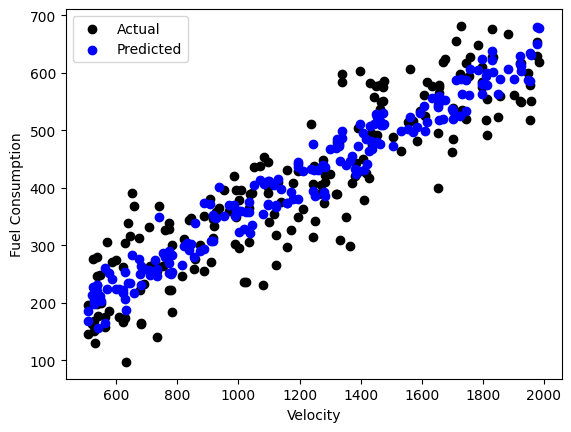

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load your satellite fuel consumption dataset

df = pd.read_csv('fuel_consumption_dataset.csv')

# Define features (X) and target variable (y)
features = df[['velocity', 'altitude', 'other_features']]
target = df['fuel_consumption']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize results (for simplicity, you can modify this based on your actual data)
plt.scatter(X_test['velocity'], y_test, color='black', label='Actual')
plt.scatter(X_test['velocity'], predictions, color='blue', label='Predicted')
plt.xlabel('Velocity')
plt.ylabel('Fuel Consumption')
plt.legend()
plt.show()
